<a href="https://colab.research.google.com/github/KrishnanandSingh/EVA/blob/master/Project-9/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA: Assignment 9

- Using [Gradcam](http://www.hackevolve.com/where-cnn-is-looking-grad-cam/) to visualise
- Improving the model using cutout

### Import Libraries and modules

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.models import load_model

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

### Get the dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

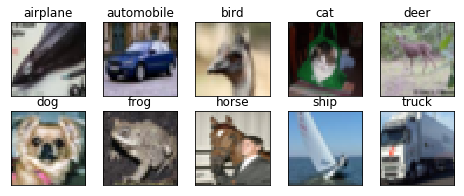

In [71]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Define method to plot model history curve after it is trained

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Define method to get validation accuracy

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Convert the pixel values to 0,1 and outputs to categorical so that it is easier to train.

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Define the model

In [7]:
dropout = 0.20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))#30, 30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Convolution2D(64, 3, 3))#28, 28
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Convolution2D(128, 3, 3))#26, 26
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Convolution2D(32, 1, 1))

model.add(MaxPooling2D(pool_size=(2, 2)))#13,13

model.add(Convolution2D(64, 3, 3))#11, 11
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Convolution2D(128, 3, 3, border_mode='same'))#9, 11
# 9, 11 (while network says 11 as the RF it is actually 9)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Convolution2D(256, 3, 3, border_mode='same'))#7, 11
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Convolution2D(32, 1, 1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Convolution2D(10, 11, 11))#-3, 1

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0625 11:12:06.512480 140300913813376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
W0625 11:12:06.534446 140300913813376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 11:12:06.537633 140300913813376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 11:12:06.572485 140300913813376 deprecation_wrapper.py:119] From /u

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
__________

### Mounting google drive
Mounting the drive to save the model when accuracy increases

In [59]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
!mkdir -p gdrive/'My Drive'/assignment9
os.chdir(r'/content/gdrive/My Drive/assignment9')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Start the training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=0, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
W0625 11:12:12.906990 140300913813376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future

Model took 2155.42 seconds to train


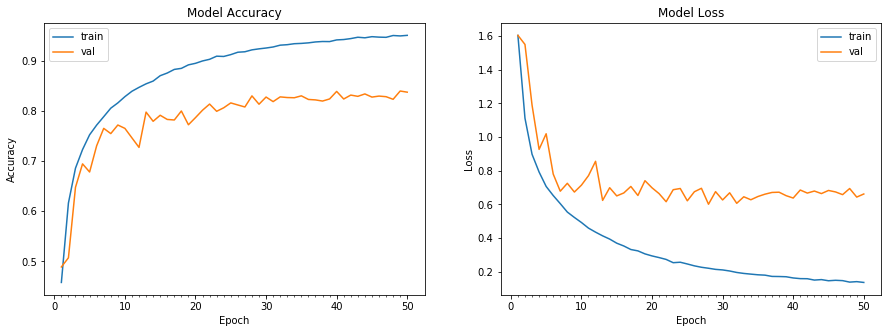

Accuracy on test data is: 83.71


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

filepath="model-checkpoint.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=0,
                                 callbacks = callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [11]:
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 83.71


## Visualization with Gradcam

### Loading the model

In [0]:
model_path="model-checkpoint.hdf5"
model = load_model(model_path)

### Visualization

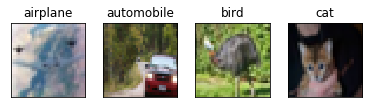

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


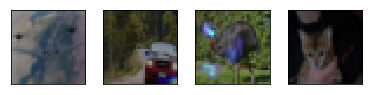

In [57]:
import cv2

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

imlist = []
fig_first = plt.figure(figsize=(8,3))
for i in range(4):
  ax = fig_first.add_subplot(2, 5, 1 + i, xticks=[], yticks=[], label='original')
  idx = np.where(test_labels[:]==i)[0]
  features_idx = test_features[idx,::]
  img_num = np.random.randint(features_idx.shape[0])

  im = features_idx[img_num]
  imlist.append(im)
  ax.set_title(class_names[i])
  plt.imshow(im)
plt.show()

fig_second = plt.figure(figsize=(8,3))

index = 0
for im in imlist:
  img = np.expand_dims(im, axis=0)
  preds = model.predict(img)
  class_idx = np.argmax(preds[0])
  np.shape(model.output)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("dropout_7")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img])
  for i in range(32):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (im.shape[1], im.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
  superimposed_img = cv2.addWeighted(im, 0.6, heatmap, 0.4, 0)


  ax = fig_second.add_subplot(2, 5, 1+index, xticks=[], yticks=[])
  plt.imshow(superimposed_img)
  index += 1

  
plt.show()

## Training with Cutout

### Random eraser

ref: https://github.com/yu4u/cutout-random-erasing

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser


### Define the model

In [17]:
from keras.layers import SpatialDropout2D
dropout = 0.10

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))#30, 30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(dropout))
model.add(Convolution2D(64, 3, 3))#28, 28
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(dropout))
model.add(Convolution2D(128, 3, 3))#26, 26
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(dropout))
model.add(Convolution2D(32, 1, 1))

model.add(MaxPooling2D(pool_size=(2, 2)))#13,13

model.add(Convolution2D(64, 3, 3))#11, 11
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(dropout))
model.add(Convolution2D(128, 3, 3, border_mode='same'))#9, 11
# 9, 11 (while network says 11 as the RF it is actually 9)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(dropout))

model.add(Convolution2D(256, 3, 3, border_mode='same'))#7, 11
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(dropout))

model.add(Convolution2D(32, 1, 1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(dropout))

model.add(Convolution2D(10, 11, 11))#-3, 1

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-pack

### Using cutout in ImageDataGenerator and starting the training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 45s 116ms/step - loss: 1.7382 - acc: 0.3961 - val_loss: 1.3951 - val_acc: 0.5133

Epoch 00001: val_acc improved from -inf to 0.51330, saving model to cutout-model-checkpoint.hdf5
Epoch 2/50
390/390 [==============================] - 43s 110ms/step - loss: 1.3106 - acc: 0.5412 - val_loss: 1.0372 - val_acc: 0.6337

Epoch 00002: val_acc improved from 0.51330 to 0.63370, saving model to cutout-model-checkpoint.hdf5
Epoch 3/50
390/390 [==============================] - 43s 109ms/step - loss: 1.0938 - acc: 0.6173 - val_loss: 0.9109 - val_acc: 0.6819

Epoch 00003: val_acc improved from 0.63370 to 0.68190, saving model to cutout-model-checkpoint.hdf5
Epoch 4/50
390/390 [==============================] - 43s 109ms/step - loss: 0.9774 - acc: 0.6571 - val_loss: 0.8191 - val_acc: 0.7123

Epoch 00004: val_acc improved from 0.68190 to 0.71230, saving model to cutout-model-checkpoint.hdf5
Epoch 5/50
390/390 [==============================] - 43s 1

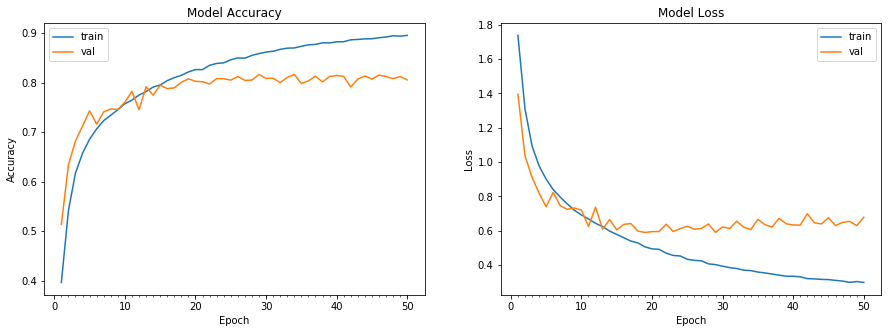

Accuracy on test data is: 80.52


In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(p=0.5, 
                                          v_l=0, v_h=1, pixel_level=False))

# p : the probability that random erasing is performed
# v_l, v_h : minimum / maximum value for erased area
# pixel_level : pixel-level randomization for erased area

filepath="cutout-model-checkpoint.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks = callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [32]:
from keras.models import load_model
modelfile = 'model-checkpoint_50epoch.hdf5'
model = load_model(modelfile)
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 83.94


## Visualizing newly trained model with Gradcam

### Loading model

In [0]:
model_path="cutout-model-checkpoint.hdf5"
model = load_model(model_path)

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
spatial_dropout2d_8 (Spatial (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 64)        256       
__________

### Visualising

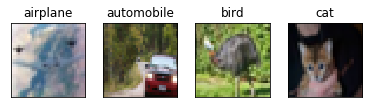

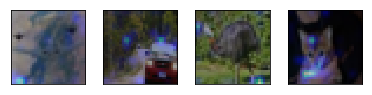

In [82]:
import cv2

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig_first = plt.figure(figsize=(8,3))
i = 0
for im in imlist:
  ax = fig_first.add_subplot(2, 5, 1 + i, xticks=[], yticks=[], label='old')
  ax.set_title(class_names[i])
  i += 1
  plt.imshow(im)
plt.show()

fig_second = plt.figure(figsize=(8,3))

index = 0
for im in imlist:
  img = np.expand_dims(im, axis=0)
  preds = model.predict(img)
  class_idx = np.argmax(preds[0])
  np.shape(model.output)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("spatial_dropout2d_14")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img])
  for i in range(32):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (im.shape[1], im.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
  superimposed_img = cv2.addWeighted(im, 0.6, heatmap, 0.4, 0)


  ax = fig_second.add_subplot(2, 5, 1+index, xticks=[], yticks=[])
  plt.imshow(superimposed_img)
  index += 1

  
plt.show()